# Predicting Zomato Restaurants Rate 

## Problem Statement:


- The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of the restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry hasn’t been saturated yet and the demand is increasing day by day. 
- In spite of the increasing demand, however, has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

## Opportunity:-

- From all the Data available, we can bring out some neat insights or conclusions such as
1.What is the most liked Dish type?

2.How many types of Restaurant types are there?

3.What is the most liked Restaurant type?

4.What is the Average cost for 2 persons?

5.Which franchise is the most popular and which has the highest no. of Restaurants?

6.Is there Delivery option available or not?

7.Does location affect the rating?

8.How many have a book table facility

And so on…..

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nBagg')

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from joblib import dump,load
from wordcloud import WordCloud,STOPWORDS
plt.rcParams['figure.figsize'] = [15,8]
import ast #Abstract Syntax Trees

In [2]:
# Import zomato dataset:

data = pd.read_csv("zomato.csv")
data.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
33454,https://www.zomato.com/bangalore/deepam-tiffin...,"4/1, 2nd Cross Road, 1st Stage, BTM Layout, Be...",Deepam Tiffins,No,No,-,0,+91 7003050054\n+91 9748122867,BTM,Quick Bites,NaN,"South Indian, North Indian, Chinese",300,"[('Rated 5.0', 'RATED\n \nGood'), ('Rated 5.0'...",[],Delivery,Koramangala 6th Block
7998,https://www.zomato.com/bangalore/rajwada-food-...,"Shop 3, Gurukrupa Complex, Green Garden Layout...",Rajwada Food,Yes,No,3.5/5,16,+91 8619930892\r\n080 48141288,Marathahalli,Quick Bites,NaN,North Indian,300,"[('Rated 2.0', 'RATED\n Quite average food.Or...",[],Dine-out,Brookefield
44081,https://www.zomato.com/bangalore/vinnys-new-be...,"22, 1st Floor MSR Nagar, ITI layout, New BEL R...",Vinny's,Yes,No,4.1 /5,1107,080 41999113\n+91 9148842123,New BEL Road,Casual Dining,"Pizza, Pasta, Mocktails, Nachos, Mushroom Soup...","Italian, Pizza",700,"[('Rated 3.0', ""RATED\n Food-4.5(for the pizz...","['French Fries', 'Cheese Garlic Bread', 'BBQ C...",Delivery,New BEL Road
2414,https://www.zomato.com/bangalore/swad-punjab-d...,"19th Main, 7th Cross, Mahadeshwara Nagar, NS P...",Swad Punjab Da,Yes,No,3.7/5,41,+91 7411990692,BTM,Quick Bites,NaN,North Indian,150,"[('Rated 5.0', 'RATED\n Being a Punjabi in ba...",[],Dine-out,Bannerghatta Road
41235,https://www.zomato.com/bangalore/raja-bhojaun-...,"1/1, Yemalur Main, Opposite Ganesha Temple, Be...",Raja Bhojaun,Yes,No,3.4 /5,20,+91 8150832594\n+91 8971108282,Marathahalli,"Takeaway, Delivery",NaN,"Chinese, North Indian, South Indian",250,"[('Rated 1.0', 'RATED\n worst taste. roti was...","['Paneer Tikka Masala', 'Veg Biryani', 'Veg Pu...",Delivery,Marathahalli


## Column Description:



- url : zomato url for the restaurants

- address : complete location of the restaurant

- name : name of the restaurant

- online_order : whether restaurant accepts online order

- book_table : whether restaurant provides option for booking table

- rate : restaurants rating on zomato website

- votes : number of individual who voted for restaurants

- phone : contact details of the restaurant

- localtion : area where restaurant is situated

- rest_type : Type of restaurants (Categorical value)

- dish_liked : what are all dishes of the restaurant that people liked

- cuisines : cuisines offered by the restaurant

- approx_cost(for two people) : average cost for two people

- review_list : reviews of the restaurant on zomato website

- menu_item : menu items available in the restuarant

- listed_in(type) : type of the restaurant

- listed_in(city) : locality of the restaurant position


In [3]:
# checking number of rows and columns:

print('Data has {} columns and {} rows'.format(data.shape[0],data.shape[1]))

Data has 51717 columns and 17 rows


In [4]:
# Checking for null values:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# Checking for data types:

data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
# Checking 5 point summdary for Numerical columns:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


### Observation:

- Minimum votes value is 0, can be interpreted as there are some restaurants which have 0 votes.
- Maximum votes value is 16832, there is a restaurant which has 16832.
- Average votes value is 284.

In [7]:
# Checking 5 point summdary for Categorical columns:

data.describe(include='object').T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/dakshin-birya...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


In [8]:
# Checking for Null values:

data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
# Checking for duplicate values:

data.duplicated().sum()

0

## Data Preprocessing:


- Adjust column names and dropped irrelevant columns

In [10]:
data.loc[:,['url','phone','name','location','address', 'listed_in(city)']].sample(10)

,url,phone,name,location,address,listed_in(city)
44054,https://www.zomato.com/bangalore/prs-indian-fo...,+91 8495059555,PRS Indian Food Restaurant,Yeshwantpur,"Number 33, 3rd Main Road, Mathikere",New BEL Road
45687,https://www.zomato.com/bangalore/mac-fast-food...,080 25273292\n+91 9741357705,Mac Fast Food,Old Airport Road,"1 & 2, Anjaneya Complex, Kodihalli, Old Airpor...",Old Airport Road
44130,https://www.zomato.com/bangalore/cheesy-bites-...,+91 7008128934\n+91 9916664269,Cheesy Bites,New BEL Road,"Shop 212, 3rd Main Road, MSR Nagar, Mathikere,...",New BEL Road
39076,https://www.zomato.com/bangalore/sri-ganesh-fa...,+91 9448371599,Sri Ganesh Fast Food,Shanti Nagar,"23, Langford Rd, Akkithimana Halli, Bheemanna ...",Lavelle Road
25748,https://www.zomato.com/bangalore/cuppa-joy-kal...,+91 9741305533,Cuppa Joy,Kalyan Nagar,"4C-402, 2nd Block, Opposite Arun Medical, Kaly...",Kammanahalli
13184,https://www.zomato.com/bangalore/metro-militar...,080 22486888,Metro Military Hotel,Shanti Nagar,"546/6, Langford Road, Opposite Hockey stadium,...",Church Street
36603,https://www.zomato.com/bangalore/polammas-mess...,+91 9743060222,Polamma's Mess,Koramangala 7th Block,"48, Hosur Road, Nanjappa Layout, Adugodi, Kora...",Koramangala 7th Block
16676,https://www.zomato.com/bangalore/delhi-food-fa...,+91 7065797900\r\n+91 9910009994,Delhi Food Factory,HSR,"Municipal Khatha - 1511, Agara Extension, Sect...",HSR
28836,https://www.zomato.com/bangalore/ammas-special...,+91 8050781208,Amma's Special,Koramangala 1st Block,"Devappa Compound, Venkatapura Teachers Colony ...",Koramangala 4th Block
16349,https://www.zomato.com/bangalore/hot-and-spicy...,+91 7022309896\r\n+91 7349105750,Hot and Spicy Restaurant,Bommanahalli,"Plot 24/10, Venkteshswara temple South, Bomman...",HSR


- Here, we can see that 3 columns are representing same information, so just dropping column which are not important.

- we are going to keep the location column and drop the address and listed_in(city) columns columns url , phone , we are not interested in ,to be dropped too

In [11]:
# Dropping the column "url", "phone", "address", "listed_in(city)" and saving the new dataset as "zomato":

drop_col=['url','phone','address', 'listed_in(city)']
data.drop(drop_col,axis=1,inplace=True)

In [12]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


In [13]:
data.duplicated().sum()

9809

In [14]:
# Removing duplicate values:

data.drop_duplicates(inplace=True)

In [15]:
# checking number of rows and columns after removing duplicate values:

print('Data has {} columns and {} rows'.format(data.shape[0],data.shape[1]))

Data has 41908 columns and 13 rows


In [16]:
#Remove the NaN values from the dataset:

((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

### Observation:

- We can oberve that 48% dish_liked is missing as well as 10% rate values are missing.
- If we drop everything out, we will lose more than 55% points.

In [17]:
d=data.rate

In [18]:
#lets examine rate column
d.value_counts()

3.9/5     1858
3.7/5     1711
3.8/5     1703
3.9 /5    1663
NEW       1593
          ... 
2.0 /5       6
2.2 /5       5
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [19]:
d.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- There are some points which has 'NEW' rating and '-' rating, which is completely incorrect.

In [20]:
d=d.replace('NEW',np.nan)
d=d.replace('-',np.nan)

In [21]:
data['rate']=d.str.replace(r'/5| /5', '')

In [22]:
d.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
#if we look closely at the reviews_list data we can clearly see that it has rating values
data.reviews_list.values[:10]

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [24]:
%time data.reviews_list=data.reviews_list.apply(lambda x: ast.literal_eval(x))

Wall time: 22.7 s


In [25]:
data.reviews_list[0][0][0].split()[0]

'Rated'

In [26]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

In [27]:
%time data['rate_new']=data.reviews_list.apply(lambda x: extract_features_from_review_list(x))

Wall time: 1.44 s


In [28]:
data.loc[:,['rate','rate_new']].sample(10)

,rate,rate_new
9666,3.2,NaN
50646,3.6,5.0
18544,3.4,4.8
3517,3.9,3.0
19116,4.6,4.1
48293,4.1,3.6
39324,4.1,3.5
2337,3.7,NaN
9014,3.9,2.9
41433,3.8,3.4


In [29]:
# apply the changes
nan_index = data.query('rate != rate & rate_new == rate_new').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'rate_new']

In [30]:
data.rate.isna().sum()

4861

- We have saved more than 1000 points.

In [31]:
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           11.60
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
rate_new                       25.71
dtype: float64

In [32]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [33]:
# checking number of rows and columns after removing duplicate values:

print('Data has {} columns and {} rows'.format(data.shape[0],data.shape[1]))

Data has 36840 columns and 14 rows


In [34]:
data.drop('rate_new',axis=1,inplace=True)

In [35]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [36]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15277
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [37]:
data[data.cuisines.isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
440,Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,NaN,100,[],[],Delivery
6887,Noodle Oodle,Yes,No,3.6,9,Whitefield,Delivery,NaN,NaN,400,"[(Rated 4.0, RATED\n Lil oily else good), (Ra...","['Chilly Chicken', 'Mixed Veg Noodles', 'Veg S...",Delivery
22236,Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,NaN,100,[],"['Sweet Lassi', 'Mango Lassi', 'Khowa Lassi', ...",Delivery
24725,Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,NaN,600,"[(Rated 1.0, RATED\n Mediocre!\n\nWe went the...",[],Dine-out
26186,Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,NaN,600,"[(Rated 1.0, RATED\n Mediocre!\n\nWe went the...",[],Dine-out
40625,Noodle Oodle,Yes,No,3.7,12,Whitefield,Delivery,NaN,NaN,400,"[(Rated 4.0, RATED\n Lil oily else good), (Ra...","['Gobi Manchurian', 'Chilly Chicken', 'Mixed V...",Delivery
50355,Noodle Oodle,Yes,No,3.7,12,Whitefield,Delivery,NaN,NaN,400,"[(Rated 4.0, RATED\n Lil oily else good), (Ra...",[],Delivery
50439,Taste of Chettinad,Yes,No,3.2,6,Whitefield,Delivery,NaN,NaN,400,"[(Rated 1.0, RATED\n The biryani was not even...",[],Delivery


- Simply removing these 8 rows wont impact our data much

In [38]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [39]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15269
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [40]:
data.rename(columns={'listed_in(type)':'type','approx_cost(for two people)':'cost'},inplace=True)

data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet


In [41]:
data.rest_type.value_counts()

Quick Bites                   12006
Casual Dining                  8720
Cafe                           2982
Dessert Parlor                 1665
Delivery                       1486
                              ...  
Bakery, Food Court                2
Cafe, Food Court                  2
Dessert Parlor, Food Court        1
Quick Bites, Kiosk                1
Bakery, Beverage Shop             1
Name: rest_type, Length: 88, dtype: int64

In [42]:
data.rest_type.fillna(value='Quick Bites',inplace=True)

In [43]:
data.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      15269
cuisines            0
cost                0
reviews_list        0
menu_item           0
type                0
dtype: int64

In [44]:
#converting to lowercase
data.dish_liked=data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

data['dish_liked'].head(6)

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
Name: dish_liked, dtype: object

In [45]:
sum(data.menu_item=='[]')

26078

In [46]:
data[data.dish_liked.isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[(Rated 5.0, RATED\n Awesome food ??Great ser...",[],Buffet
19,360 Atoms Restaurant And Cafe,Yes,No,3.1,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[(Rated 5.0, RATED\n Friendly staffs , nice a...",[],Cafes
22,Cafe Coffee Day,No,No,3.6,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[(Rated 4.0, RATED\n This outlet is better th...",[],Cafes
24,Hide Out Cafe,No,No,3.7,31,Banashankari,Cafe,NaN,Cafe,300,"[(Rated 4.0, RATED\n The food was quite good,...",[],Cafes
25,CAFE NOVA,No,No,3.2,11,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[(Rated 1.0, RATED\n No ventilation. Smokers ...",[],Cafes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51680,Trinity Club Lounge,No,No,3.5,20,Whitefield,Lounge,NaN,Finger Food,"1,500","[(Rated 3.5, RATED\n Had a breakfast buffet h...",[],Drinks & nightlife
51706,Red Glow,No,No,3.7,27,Whitefield,Pub,NaN,"North Indian, Continental","1,200","[(Rated 5.0, RATED\n Excellent place had nice...",[],Pubs and bars
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars


In [47]:
data.reviews_list[0]

[('Rated 4.0',
  'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'),
 ('Rated 4.0',
  'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'),
 ('Rated 2.0',
  'RATED\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mos

- As we can see dishes liked or disliked are mentioned in reviews so if we can extract these dishes we can fill the nan values of dish_liked column
- We will start by getting a list of all the dishes available from our dataset

In [48]:
%%time
dish_list=[]
for i in list(data.index):
  #print(type(data.dish_liked[i]))
  if data.dish_liked[i]!='NaN' and isinstance(data.dish_liked[i],str):
      k=data['dish_liked'][i].split(',')
      dish_list.extend(k)
print(dish_list)

['pasta', ' lunch buffet', ' masala papad', ' paneer lajawab', ' tomato shorba', ' dum biryani', ' sweet corn soup', 'momos', ' lunch buffet', ' chocolate nirvana', ' thai green curry', ' paneer tikka', ' dum biryani', ' chicken biryani', 'churros', ' cannelloni', ' minestrone soup', ' hot chocolate', ' pink sauce pasta', ' salsa', ' veg supreme pizza', 'masala dosa', 'panipuri', ' gol gappe', 'onion rings', ' pasta', ' kadhai paneer', ' salads', ' salad', ' roti', ' jeera rice', 'farmhouse pizza', ' chocolate banana', ' virgin mojito', ' pasta', ' paneer tikka', ' lime soda', ' prawn pizza', 'pizza', ' mocktails', ' coffee', ' nachos', ' salad', ' pasta', ' sandwiches', 'waffles', ' pasta', ' coleslaw sandwich', ' choco waffle', ' tacos', ' momos', ' cheese nachos', 'waffles', ' pasta', ' crispy chicken', ' honey chilli chicken', ' sandwich', ' coffee', ' crepe', 'mocktails', ' peri fries', ' lasagne', ' pizza', ' chicken bbq wings', ' virgin mojito', ' nachos', 'coffee', ' spaghetti'

In [49]:
len(dish_list)

118363

In [50]:
dish_list=set(dish_list) #getting unique dishes

In [51]:
len(dish_list)

3507

In [52]:
data['reviews_list'].head(6)

0    [(Rated 4.0, RATED\n  A beautiful place to din...
1    [(Rated 4.0, RATED\n  Had been here for dinner...
2    [(Rated 3.0, RATED\n  Ambience is not that goo...
3    [(Rated 4.0, RATED\n  Great food and proper Ka...
4    [(Rated 4.0, RATED\n  Very good restaurant in ...
5    [(Rated 3.0, RATED\n  Food 3/5\nAmbience 3/5\n...
Name: reviews_list, dtype: object

In [53]:
p=data.reviews_list[0]
' '.join([i[1].replace('RATED\n ','') for i in p]).replace('\n','').replace('\S+','').replace('?','').replace('Ã','').replace('\\x','').strip().lower()

'a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.cheers  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this place is mostly visited by vegetarians. anyways we ordered ala carte items which took ages to come

In [54]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [55]:
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [56]:
data['reviews_text'].head(6)

0    a beautiful place to dine in the interiors tak...
1    had been here for dinner with family  turned o...
2    ambience is not that good enough and it's not ...
3    great food and proper karnataka style full mea...
4    very good restaurant in neighbourhood  buffet ...
5    food 3/5ambience 3/5service 3/5had been here f...
Name: reviews_text, dtype: object

In [57]:
dish_list.intersection(data['reviews_text'][100].split())

{'rice', 'thali', 'vegetarian'}

In [58]:
data['dish_liked_new']=data.reviews_text.apply(lambda x: ', '.join(list(dish_list.intersection(x.split()))))

In [59]:
data.isna().sum()

name                  0
online_order          0
book_table            0
rate                  0
votes                 0
location              0
rest_type             0
dish_liked        15269
cuisines              0
cost                  0
reviews_list          0
menu_item             0
type                  0
reviews_text          0
dish_liked_new        0
dtype: int64

In [60]:
data.dish_liked_new.isna().sum()

0

In [61]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_liked_new']].sample(5,random_state=1)

,dish_liked,dish_liked_new
32901,NaN,"kheer, halwa"
44323,NaN,"tikka, rice, prawn, chicken, shawarma"
6479,NaN,
11046,NaN,rice
50112,NaN,"cappuccino, coffee"



- So, now we can replace this missed values from the dish_n_review

In [62]:
nan_index=data.query('dish_liked !=dish_liked & dish_liked_new==dish_liked_new').index
nan_index

Int64Index([    6,    19,    22,    24,    25,    26,    27,    28,    32,
               36,
            ...
            51670, 51672, 51673, 51674, 51678, 51680, 51706, 51709, 51712,
            51716],
           dtype='int64', length=15269)

In [63]:
%%time
for i in nan_index:
    data.loc[i,'dish_liked']=data.loc[i,'dish_liked_new']

Wall time: 26.3 s


In [64]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'reviews_text', 'dish_liked_new'],
      dtype='object')

In [65]:
data.drop(['dish_liked_new','reviews_text'],axis=1,inplace=True)

In [66]:
data.head(6)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"onion rings, pasta, kadhai paneer, salads, sal...",North Indian,600,"[(Rated 3.0, RATED\n Food 3/5\nAmbience 3/5\n...",[],Buffet


In [67]:
data.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
dtype: int64

In [68]:
print('Data has {} columns and {} rows'.format(data.shape[0],data.shape[1]))

Data has 36832 columns and 13 rows


## EDA


## Data Visualizations

### How many Restaurant accepting online orders?

In [69]:
online_order = data.online_order.value_counts()
online_order

Yes    24969
No     11863
Name: online_order, dtype: int64

Text(0.5, 1.0, 'Restaurants accepting online orders, Yes or Not')

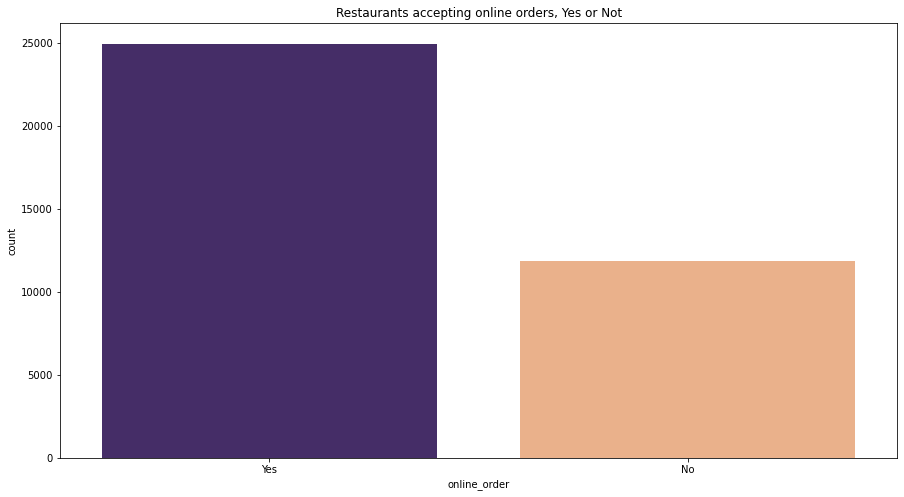

In [70]:
sns.countplot(data['online_order'], palette=['#432371',"#FAAE7B"])
fig = plt.gcf()
plt.title('Restaurants accepting online orders, Yes or Not')

- **Of all the registered Restaurants in zomato, How many are Accepting online orders and how many are not accepting. from the graph below we can say that we have almost 25000 Restaurants in Bangalore that Accepts online orders through zomato and Almost of 12000 are not accpeting any online orders through zomato.**

## What is distrubution of 'Rate column'?

In [71]:
data.rate=data.rate.astype('float')

The mean value of rate is :- 3.7208921589921835


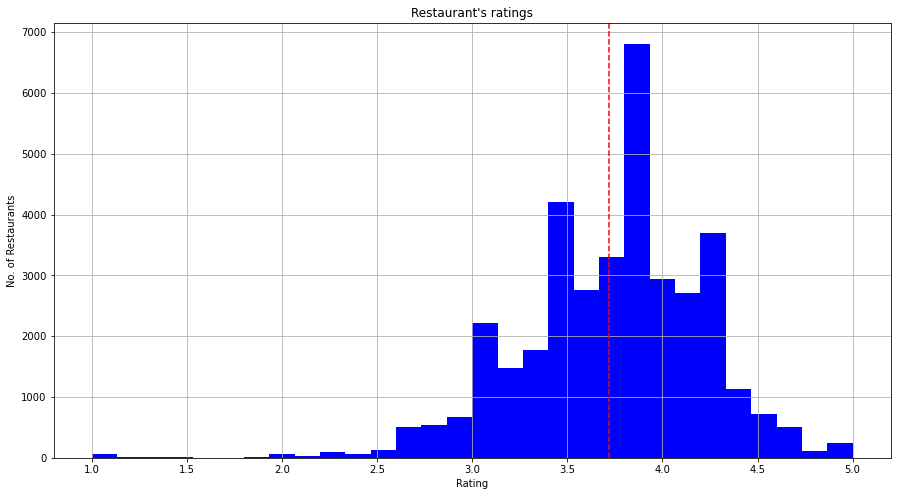

In [72]:
print("The mean value of rate is :-",data.rate.mean())
data.rate.hist(color='blue',bins=30)
plt.axvline(x=data.rate.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()

In [73]:
data.book_table.value_counts

<bound method IndexOpsMixin.value_counts of 0        Yes
1         No
2         No
3         No
4         No
        ... 
51709     No
51711     No
51712     No
51715    Yes
51716     No
Name: book_table, Length: 36832, dtype: object>

Text(0.5, 1.0, 'Number of Restaurants has book table option')

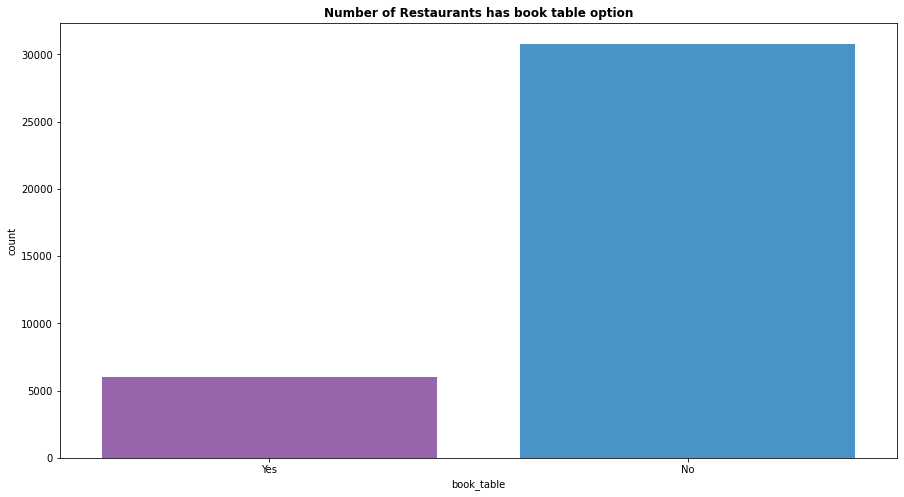

In [74]:
sns.countplot(data['book_table'],palette=["#9b59b6", "#3498db"])
fig = plt.gcf()
plt.title('Number of Restaurants has book table option', weight='bold')

- Most restaurants do not have book a table option

- **As similar we have several Restaurants with Book table facility and few dont have. After analysing the Data we have we come to know that out of all the Registered 30,000 restaurants only A 5000 are accepting Book table facility.**

### In Bangalore city,in which area has maximum number of restaurants

In [75]:
data.location.value_counts()

BTM                      3161
Koramangala 5th Block    2056
HSR                      1807
Indiranagar              1793
Whitefield               1616
                         ... 
Yelahanka                   4
West Bangalore              4
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64


- As we can see there are total 92 different locations in Bangalore.

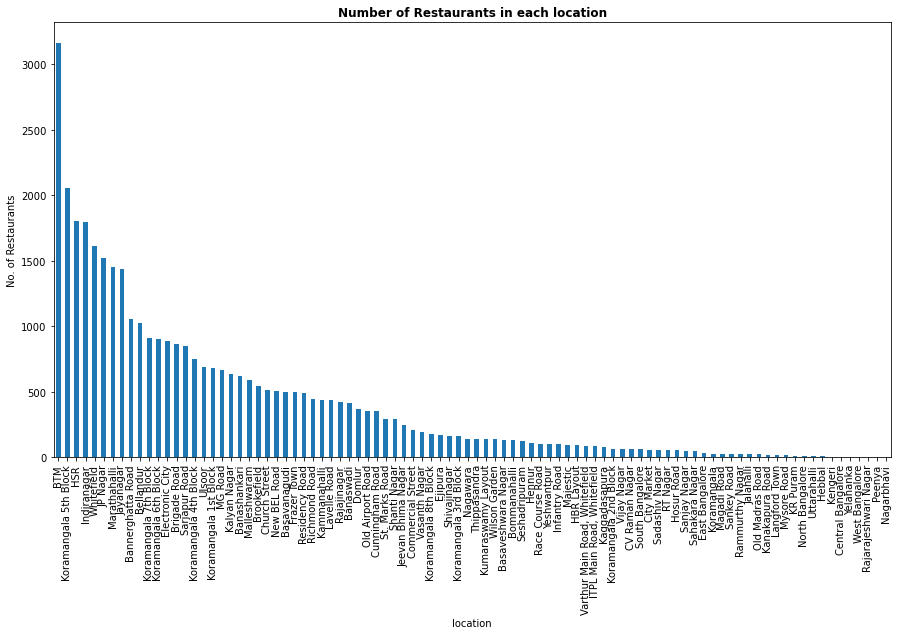

In [76]:
#plotting

ax =data.location.value_counts().plot(kind='bar')
plt.title('Number of Restaurants in each location', weight='bold')
plt.xlabel('location')
plt.ylabel('No. of Restaurants')
plt.show()

- **In the Graph above we see that some locations are shared while we have 93 locations. you can see below the Bar Graph of Location column.**

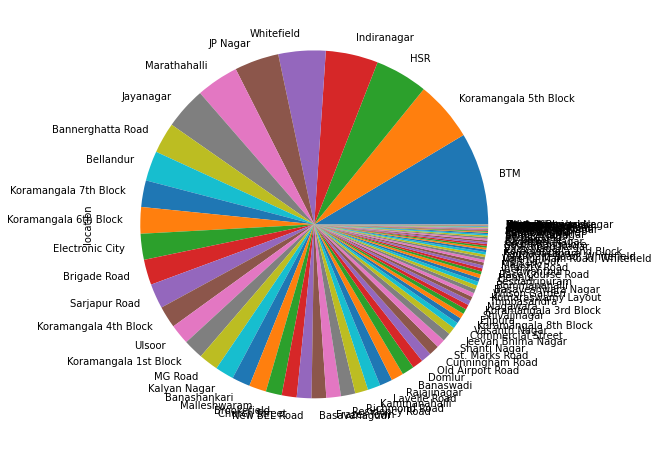

In [77]:
#plotting pie chart

ax=data.location.value_counts().plot(kind='pie')
plt.show()

Text(0.5, 1.0, 'Location')

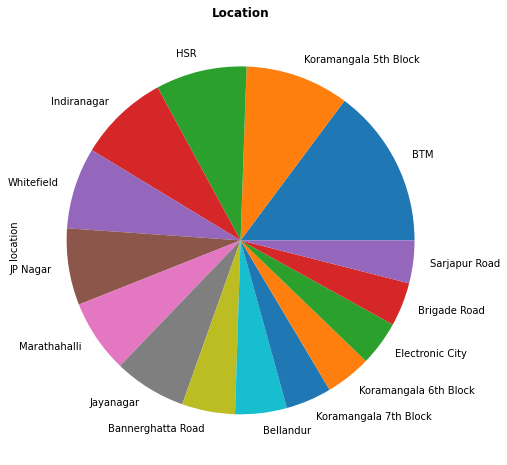

In [78]:
data['location'].value_counts()[:15].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

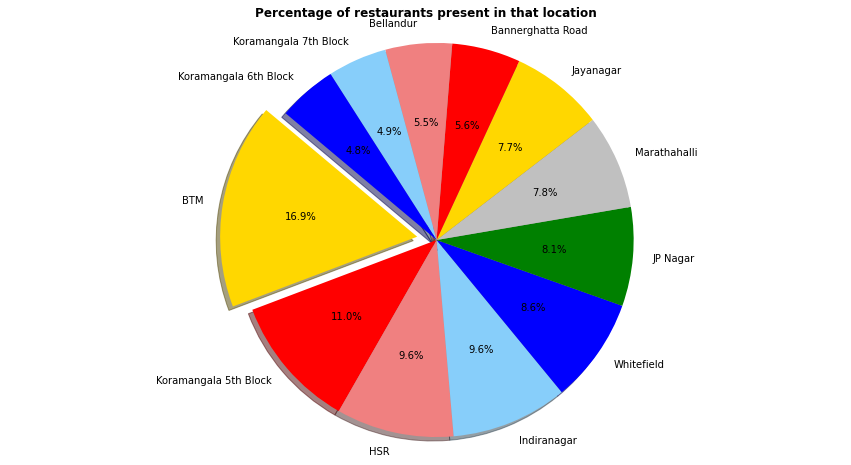

In [79]:
names = data['location'].value_counts()[:12].index
values = data['location'].value_counts()[:12].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

- **We have overall 93 locations where all the 51,000 Restaurants lie. Let’s see which one has More restaurants in Each location. We know that pie graph is always a composition of 100% and From the Pie Graph below you can see only The Top 12 Restaurants out of many.**

## Top 20 restaurants by name

In [80]:
top_20=data.name.value_counts()[:20]

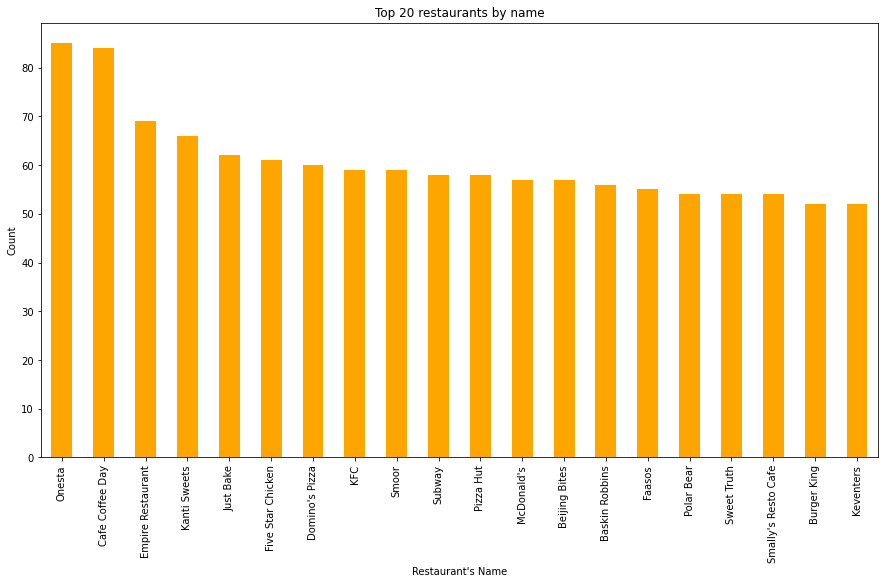

In [81]:
ax=top_20.plot(kind='bar',color='orange')
plt.title('Top 20 restaurants by name')
plt.xlabel("Restaurant's Name")
plt.ylabel('Count')
plt.show()

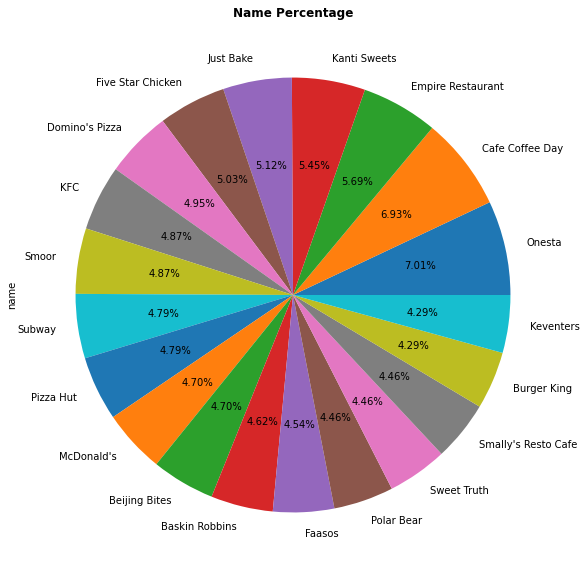

In [82]:
plt.figure(figsize=(15,10))
ax=top_20.plot(kind='pie',autopct='%1.2f%%')
plt.title('Name Percentage', weight='bold')
plt.show()

- we can say that 'Onesta' day has highest count among all

### What type of restaurants are there in Bangalore? also percentage and counts

In [83]:
top_types20=data.rest_type.value_counts()[:15]

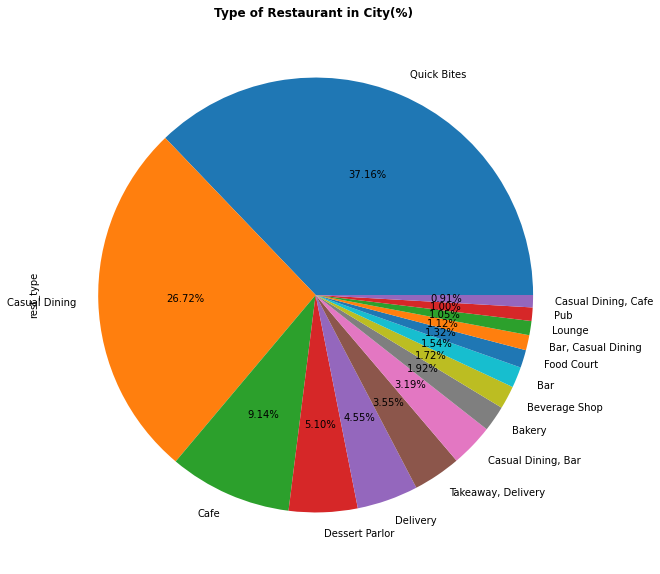

In [84]:
plt.figure(figsize=(15,10))
ax=top_types20.plot(kind='pie',autopct='%1.2f%%')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

- **We have several Restaurant types such as Quick bytes, Casual Dining, Cafe, Delivery, Dessert Parlors, Bar, Food court, Pubs, Lounge, Sweet shop and so on. you are seeing only the top 6 Restaurant types sharing a Pie Graph.**

Text(0, 0.5, 'counts')

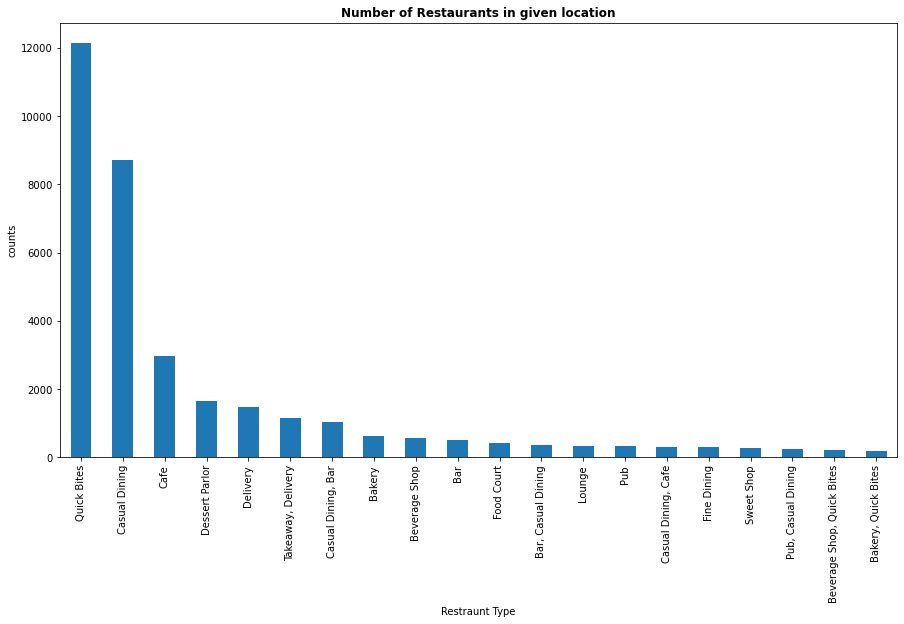

In [85]:
ax =data.rest_type.value_counts()[:20].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Restraunt Type')
plt.ylabel('counts')

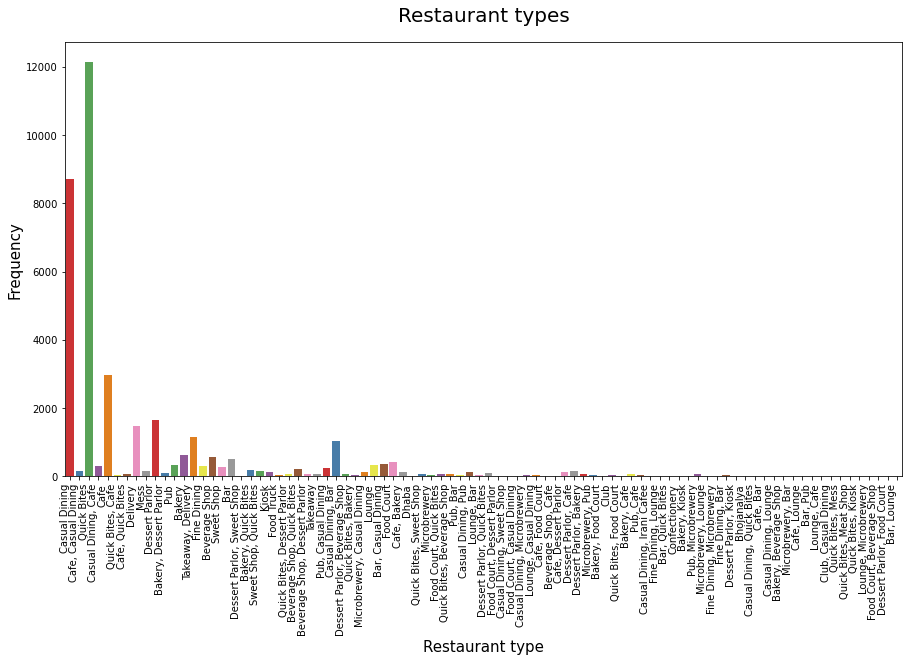

In [86]:
rest = sns.countplot(x="rest_type",data=data, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)
plt.savefig('Restaurant types')

- Mostly 'Quick Byte' restaurants are present

### What is the Average cost in restaurants?

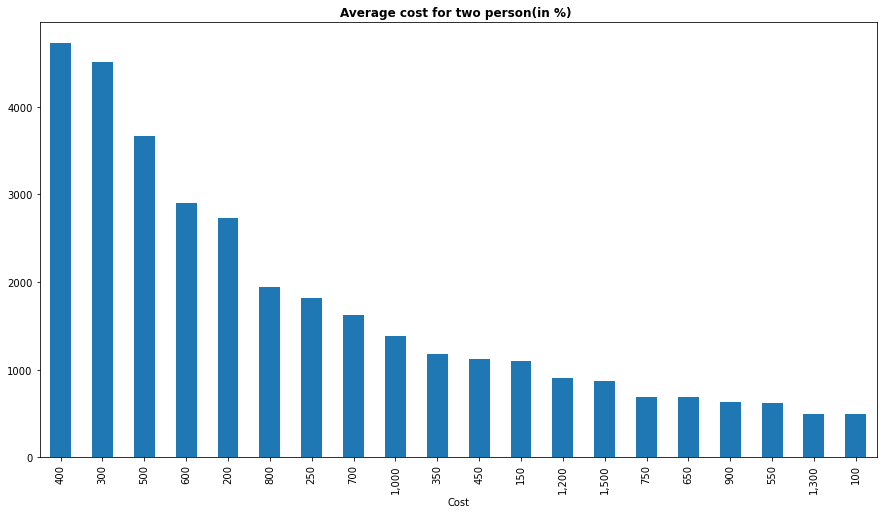

In [87]:
#plotting
ax =data.cost.value_counts()[:20].plot(kind='bar')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.xlabel('Cost')
plt.show()

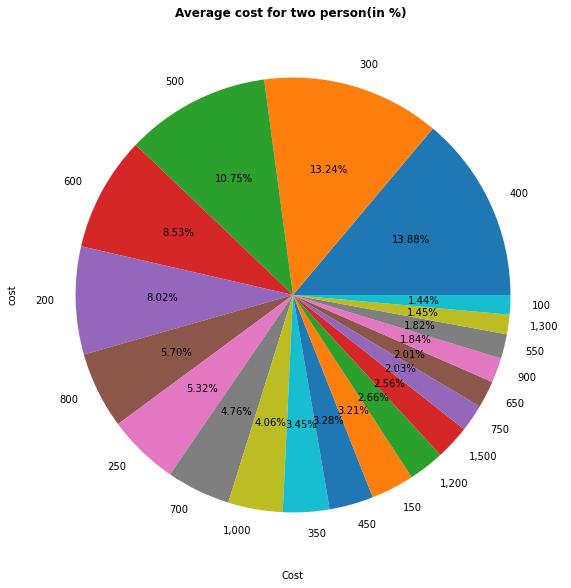

In [88]:
plt.figure(figsize=(15,10))
ax=data.cost.value_counts()[:20].plot(kind='pie',autopct='%1.2f%%')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.xlabel('Cost')
plt.show()

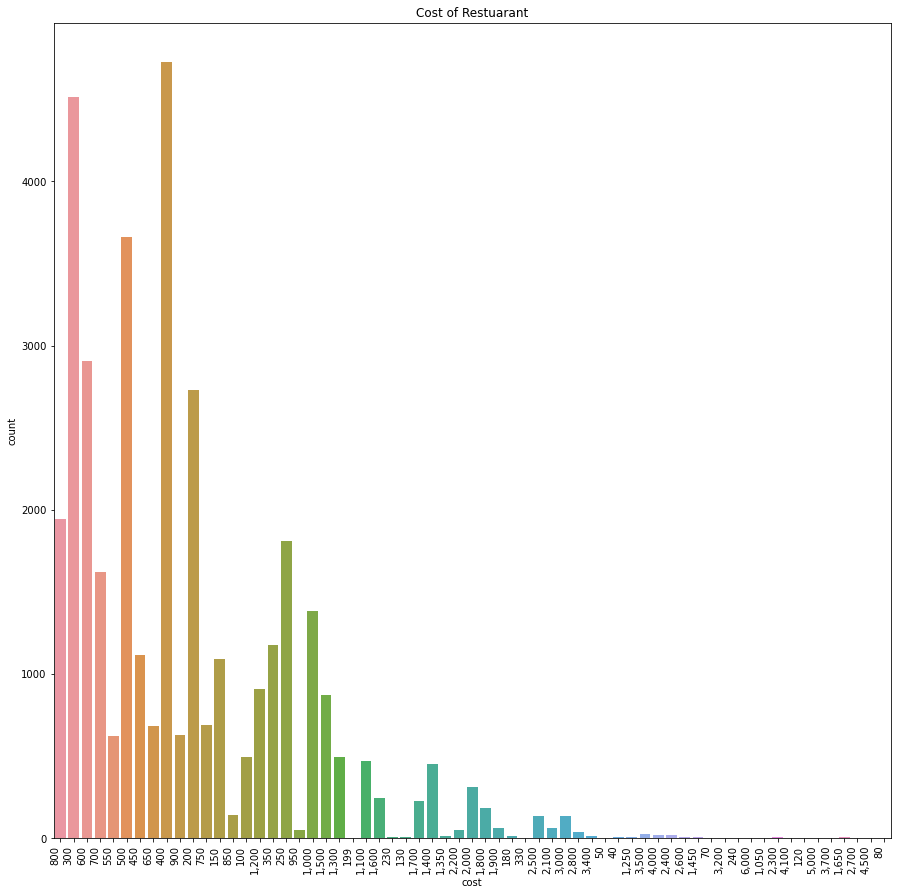

In [89]:
sns.countplot(data['cost'])
sns.countplot(data['cost']).set_xticklabels(sns.countplot(data['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')
plt.savefig('Cost of Restaurant')

- Average cost for 2 is around 300-400 for 27% restaurants and below 500 for approx 52% restaurants

- **We have several costs ranging from 300 to 4000 for 2 people depends upon the Restaurant type, Dishes and cuisines they order or they like. lets see the Donut Graph with Average costs for 2 people in all the Restaurants in Bangalore from zomato.**

### Which dish are most famous/favourite dish in restaurants?

In [90]:
data.dish_liked.nunique()

7492

In [91]:
data.dish_liked.unique()

array(['pasta, lunch buffet, masala papad, paneer lajawab, tomato shorba, dum biryani, sweet corn soup',
       'momos, lunch buffet, chocolate nirvana, thai green curry, paneer tikka, dum biryani, chicken biryani',
       'churros, cannelloni, minestrone soup, hot chocolate, pink sauce pasta, salsa, veg supreme pizza',
       ...,
       'noodles, chicken noodle, momos, american chopsuey, salad, manchow soup, manchurian',
       'chicken quesadilla, naan, breakfast buffet, cheesecake, cocktails, lunch buffet, biryani',
       'biryani, andhra meal'], dtype=object)

In [92]:
dishes=[j.strip() for i in data.dish_liked for j in i.split(',')]

In [93]:
from collections import Counter
c=Counter(dishes)

In [94]:
c.most_common(10)

[('chicken', 6295),
 ('biryani', 4985),
 ('rice', 3637),
 ('pasta', 3619),
 ('', 3329),
 ('pizza', 3236),
 ('burgers', 3173),
 ('coffee', 3087),
 ('cocktails', 2762),
 ('fish', 2428)]

Text(0, 0.5, 'Count')

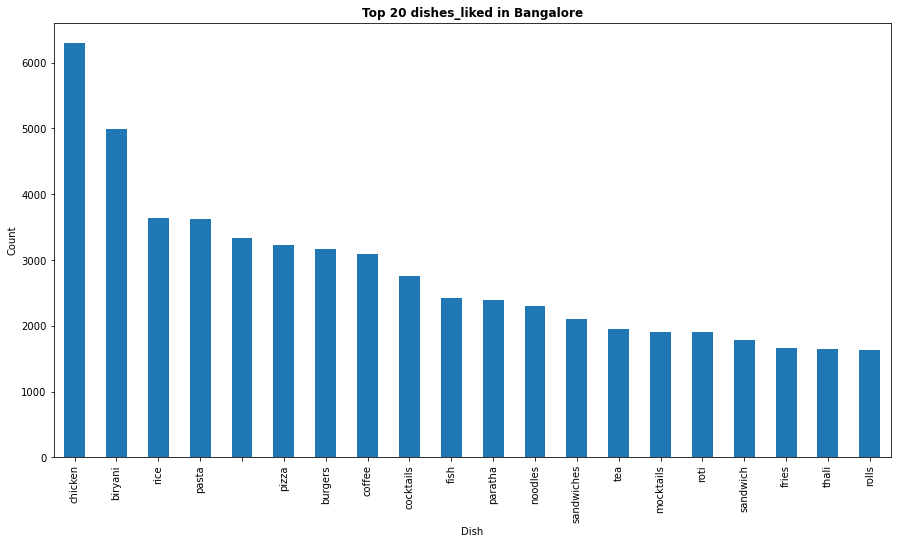

In [95]:
pd.Series(dishes).value_counts()[:20].plot(kind='bar')
plt.title('Top 20 dishes_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

- **We have a Feature/Column called Dishes_liked, which tells about all the different dish types that people in Bangalore likes. Dishes such Pasta, Burgers, Pizza, Biryani, Sandwiches, paratha and so on. From the graph to know,What is the Bangalore most liked Food.**
- **Most people love Chicken and biryani.**

### WordCloud

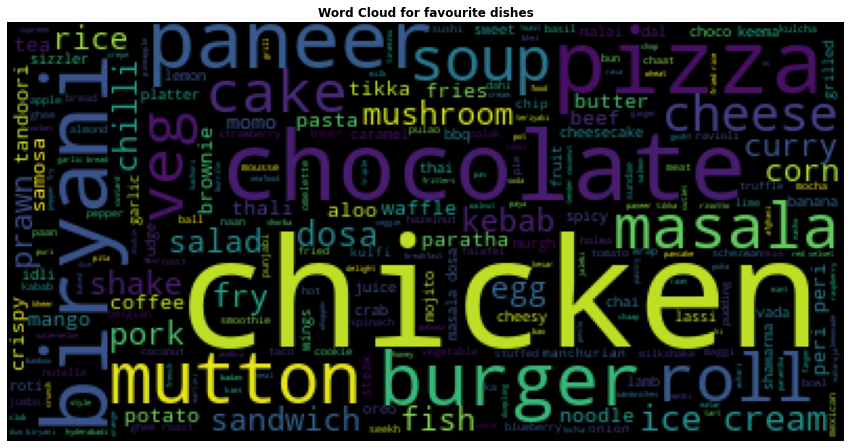

In [96]:
set_dishes=set(dishes)
dish_word_cloud = ', '.join(set_dishes)
wc=WordCloud(background_color='black',stopwords=STOPWORDS,max_words=len(dish_word_cloud))
wc.generate(dish_word_cloud)
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for favourite dishes',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

### Lets see 'Rate' vs 'Restaurant type' graph

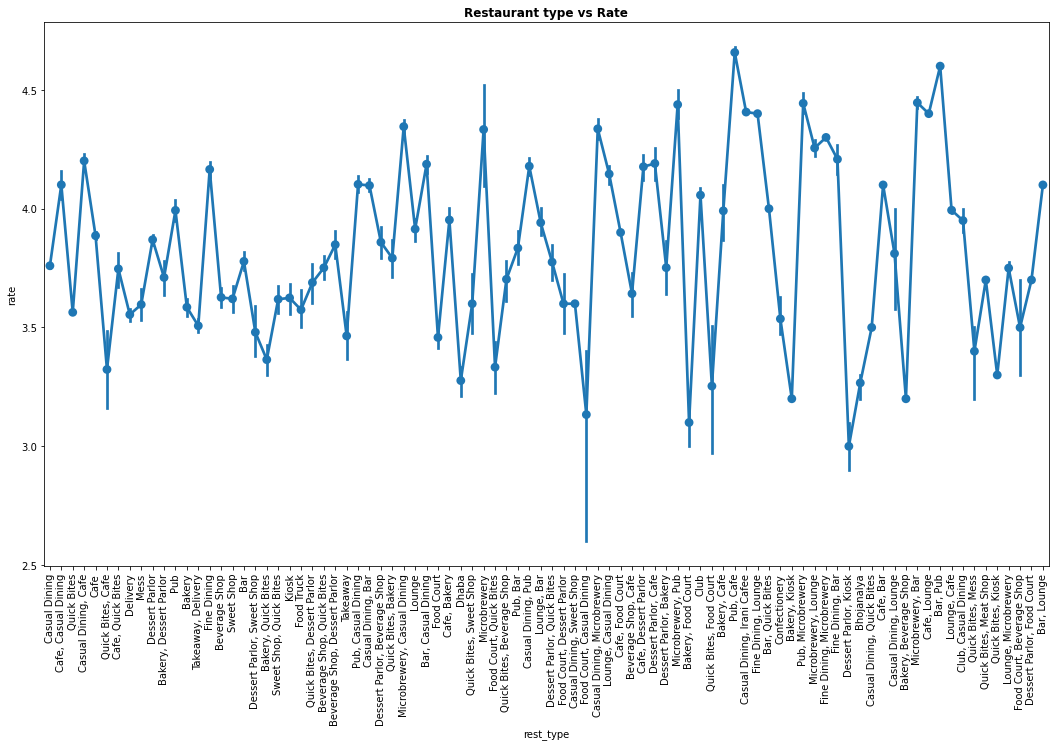

In [97]:
f,ax=plt.subplots(figsize=(18,10))
g=sns.pointplot(y='rate',x='rest_type',data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Restaurant type vs Rate', weight = 'bold')
plt.show()

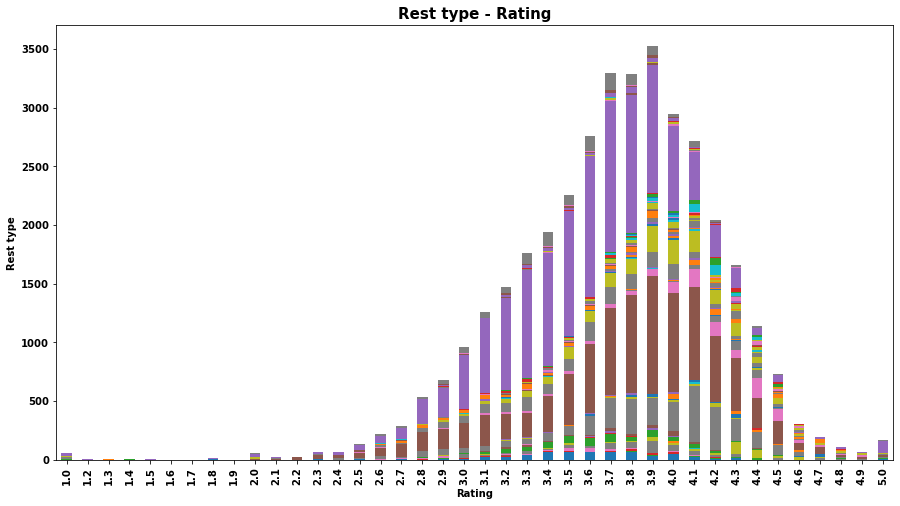

In [98]:
loc_plt=pd.crosstab(data['rate'],data['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

- **We also have a column for Rating given to Each and Every restaurant on Average by all the people who ordered or visited. after Analysing we come to know is 3.9 for all the Restaurants overall gained which means that are good to order or to eat from all the Restaurants in Bangalore.**

### Lets plot 'Rate' vs 'Online order'

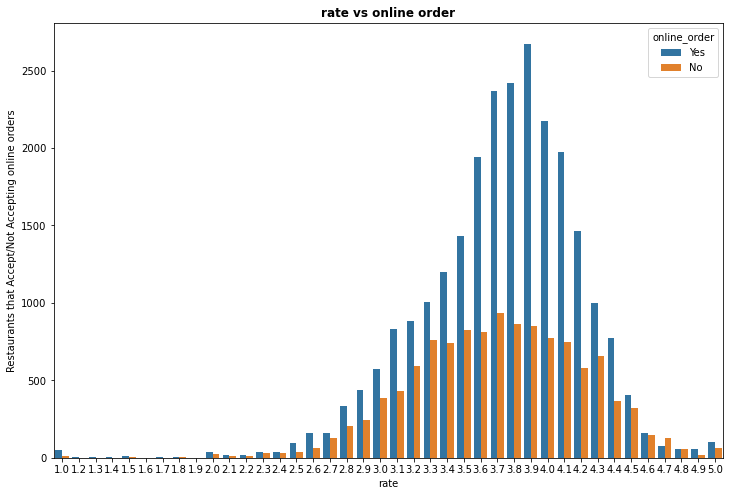

In [99]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x='rate',data=data,hue='online_order')
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs online order",weight = 'bold')
plt.show()

### Top 10 Cuisines

In [100]:
cuisines=[j.lower().strip() for i in data.cuisines for j in i.split(',')]

In [101]:
c1 = Counter(cuisines)
c1.most_common(10)

[('north indian', 15484),
 ('chinese', 11477),
 ('fast food', 5572),
 ('south indian', 5524),
 ('continental', 4851),
 ('biryani', 4519),
 ('cafe', 4292),
 ('desserts', 4101),
 ('beverages', 3524),
 ('italian', 2965)]

Text(0, 0.5, 'No of restaurants')

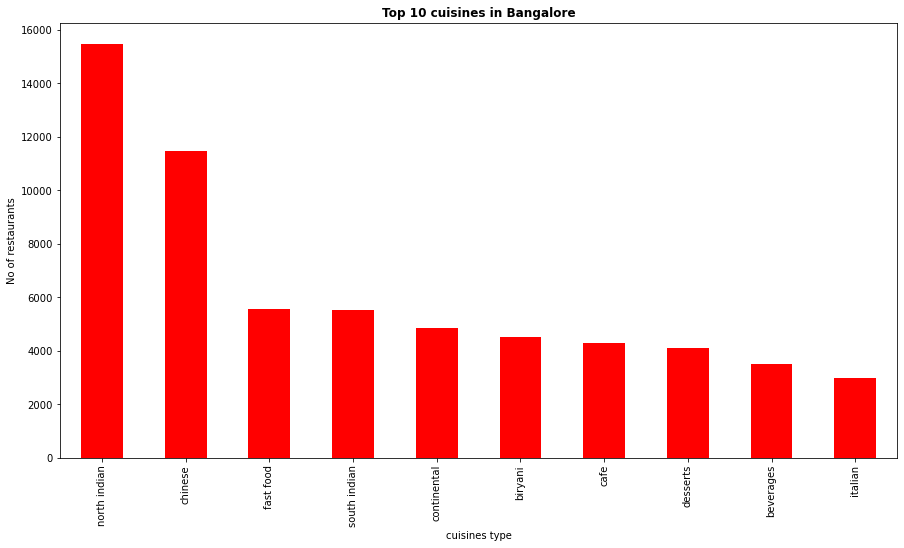

In [102]:
pd.Series(cuisines).value_counts()[:10].plot(kind='bar',color='r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

- **We have cuisines such as North Indian, Chinese, Continental, Caffe, Fast food and several others. After looking at the graph you can see that we have North Indian is the Most liked cuisine.**

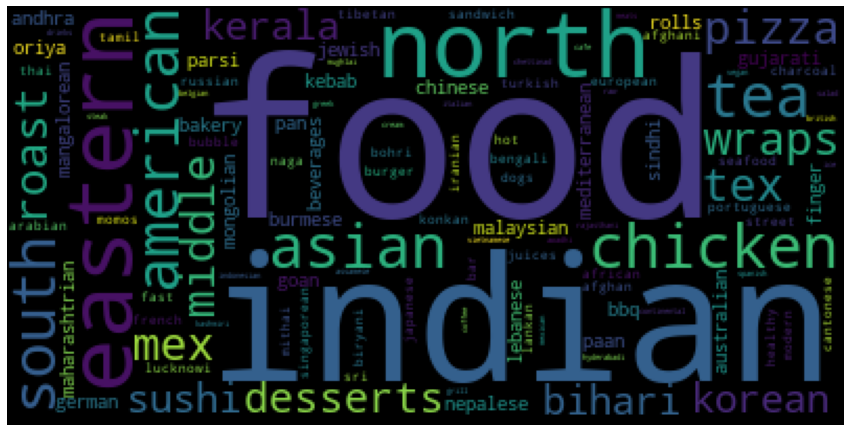

In [103]:
cuisines_set=set(cuisines)
cuisines_wc=', '.join(cuisines_set)
wc=WordCloud(stopwords=STOPWORDS,max_words=len(cuisines_wc))
wc.generate(cuisines_wc)
plt.axis("off")
plt.imshow(wc)
plt.show()

## Model Building

- Till now we were understanding, visualising data. Now let move to build proper Machine Learning model.

In [104]:
data['online_order']=pd.get_dummies(data.online_order,drop_first=True)
data['book_table']=pd.get_dummies(data.book_table,drop_first=True)

In [105]:
data.drop(columns=['dish_liked','reviews_list','menu_item','type'], inplace  =True)

In [106]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [107]:
data.rest_type=data.rest_type.str.replace(',','')
data.rest_type=data.rest_type.apply(lambda x: ' '.join(sorted(x.split())))

In [108]:
data.rest_type.head()

0         Casual Dining
1         Casual Dining
2    Cafe Casual Dining
3           Bites Quick
4         Casual Dining
Name: rest_type, dtype: object

In [109]:
data['cuisines']=data.cuisines.str.replace(',','')
data['cuisines']=data.cuisines.astype(str).apply(lambda x:' '.join(sorted(x.split())))

In [110]:
data['cuisines'].unique()

array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ..., 'Burger Fast Food Italian Mexican',
       'Biryani Food Indian North Street',
       'Arabian Chinese Indian Momos North'], dtype=object)

In [111]:
data.cost.value_counts()

400      4730
300      4514
500      3664
600      2907
200      2732
         ... 
6,000       2
3,700       1
70          1
80          1
5,000       1
Name: cost, Length: 63, dtype: int64

In [112]:
data['cost']=data.cost.str.replace(',','')
data.cost=data.cost.astype('int')

In [113]:
X = data.drop(['rate','name'],axis = 1)
y = data['rate']

In [114]:
X.shape,y.shape

((36832, 7), (36832,))

## Splitting the data for Model Building

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [116]:
from joblib import dump,load

dump(X_train, 'more_feature_X_train')
dump(X_test, 'more_feature_X_test')
dump(y_train, 'more_feature_y_train')
dump(y_test, 'more_feature_y_test')

['more_feature_y_test']

In [117]:
X_train = load('more_feature_X_train')
X_test = load('more_feature_X_test')
y_train = load('more_feature_y_train')
y_test = load('more_feature_y_test')

In [118]:
X_train.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,cost
40463,1,0,1731,Malleshwaram,Pub,Chinese Continental Indian North,1400
49689,1,0,16,Sarjapur Road,Casual Dining,Bengali Chinese Indian North,550


In [119]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [120]:
#Avoid data leakage
def onehot_fit_transform(df,col):
    out=df[col].values.reshape(-1,1)
    return encoder.fit_transform(out).toarray()

def onehot__transform(df,col):
    out=df[col].values.reshape(-1,1)
    return encoder.transform(out).toarray()

In [121]:
# one hot encoding apply to 'rest_type' features on train/test dataset
train_loc_feature=onehot_fit_transform(X_train,'location')
test_loc_feature=onehot__transform(X_test,'location')

train_type_feature=onehot_fit_transform(X_train,'rest_type')
test_type_feature=onehot__transform(X_test,'rest_type')


train_cuisines_feature=onehot_fit_transform(X_train,'cuisines')
test_cuisines_feature=onehot__transform(X_test,'cuisines')

In [122]:
print(train_loc_feature.shape)
print(test_loc_feature.shape)

(25782, 92)
(11050, 92)


In [123]:
print(train_cuisines_feature.shape)
print(test_cuisines_feature.shape)

(25782, 1678)
(11050, 1678)


In [124]:
print(train_type_feature.shape)
print(test_type_feature.shape)

(25782, 65)
(11050, 65)


In [125]:
from scipy.sparse import hstack

## combine all 'one-hot' encoded features as Tr.
tr = pd.DataFrame(pd.np.column_stack([train_loc_feature,train_cuisines_feature,train_type_feature]))

In [126]:
## CONCAT both dataframe ### ie Tr and X_train(original dataframe)

l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(25782, 1842)

In [127]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([test_loc_feature, test_cuisines_feature,test_type_feature]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(11050, 1842)

In [128]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

X_train =X_train.drop(['location','rest_type','cuisines'],axis = 1)
X_test =X_test.drop(['location','rest_type','cuisines'],axis = 1)

In [129]:
# checking final train set shape
X_train.shape, y_train.shape

((25782, 1839), (25782,))

In [130]:
dump(X_train, 'more_feature_X_train')
dump(X_test, 'more_feature_X_test')
dump(y_train, 'more_feature_y_train')
dump(y_test, 'more_feature_y_test')

['more_feature_y_test']

In [131]:
X_train= load('more_feature_X_train') 
X_test= load('more_feature_X_test')
y_train= load('more_feature_y_train')
y_test= load('more_feature_y_test')

In [37]:
def mse(y, y_pred):
    return np.mean((y_pred - y)**2)

mse_scorer = make_scorer(mse, greater_is_better=False)

In [46]:
def imp_df(column_names,importances):
    df=pd.DataFrame({ 
      'features':column_names,
      'features_importances':importances
  }).sort_values('features_importances',ascending=False).reset_index(drop=True)
    return df


# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df,title):
    sns.barplot(x='features_importances',y='features',data=imp_df,color='royalblue',orient='h').set_title(title,fontsize=20)

## Model -1 Linear Regression

In [134]:
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred_lr = regression.predict(X_test)

In [135]:
mse(y_test,y_pred_lr)

0.12461115371519355

In [136]:
lr1 = imp_df(X_train.columns,regression.coef_)
lr1.head(10)

,features,features_importances
0,777,1.555001
1,1394,1.540394
2,342,1.479393
3,1080,1.356666
4,1302,1.347041
5,280,1.339778
6,1031,1.142749
7,241,1.086981
8,506,1.017633
9,1408,0.996866


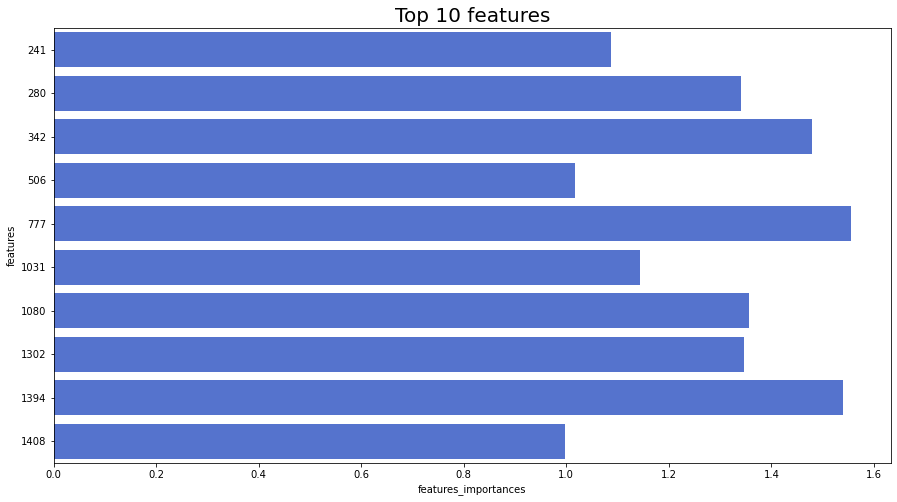

In [137]:
var_imp_plot(lr1[:10],'Top 10 features')

## Model - 2 Model - 2 SGD Regressor

In [138]:
from sklearn import linear_model
sgd_regression=linear_model.SGDRegressor()
sgd_regression.fit(X_train,y_train)
y_pred_sgd=sgd_regression.predict(X_test)

mse(y_test,y_pred_sgd)

1.6676683027322996e+28

## Model -3 Random Forest Regressors

In [139]:
from sklearn.ensemble import RandomForestRegressor

rf_regression = RandomForestRegressor() #using default values
rf_regression.fit(X_train,y_train)
y_pred_rf = rf_regression.predict(X_test)

mse(y_test,y_pred_rf)

0.02998806865715971

- Without any hyperparameter tuning RFR ie Random Forest Regressor it learning something. so let experiment on RFR.

## Hyperparameter Tuning on RFR

In [140]:
%%time
params=[{'n_estimators':[10,20,30,40]}]
regressor_params=GridSearchCV(rf_regression,params,n_jobs=-1,cv=10,verbose=1,return_train_score=True,scoring=mse_scorer)
regressor_params.fit(X_train,y_train)

#hyperparameter tuning will take 5-6 hours for 1000 estimators on high end configuration

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 21.1min finished


Wall time: 22min 15s


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': [10, 20, 30, 40]}],
             return_train_score=True,
             scoring=make_scorer(mse, greater_is_better=False), verbose=1)

In [141]:
from sklearn.ensemble import RandomForestRegressor
rf_regression2=RandomForestRegressor(n_estimators=250) #using default values
rf_regression2.fit(X_train,y_train)
y_pred_rf=rf_regression2.predict(X_test)

mse(y_test,y_pred_rf)

0.029727151923741264

In [142]:
from sklearn.ensemble import RandomForestRegressor
rf_regression3=RandomForestRegressor(n_estimators=500) #using default values
rf_regression3.fit(X_train,y_train)
y_pred_rf=rf_regression3.predict(X_test)

mse(y_test,y_pred_rf)

0.02936025424138507

- Directly using the estimators as we have only 1 parameter to tune

In [143]:
rf1=imp_df(X_train.columns,rf_regression3.feature_importances_)
rf1.head(10)

,features,features_importances
0,votes,0.396877
1,cost,0.068814
2,book_table,0.017249
3,1819,0.014290
4,1690,0.013078
5,online_order,0.012738
6,1337,0.011958
7,1796,0.008953
8,1807,0.008805
9,0,0.008739


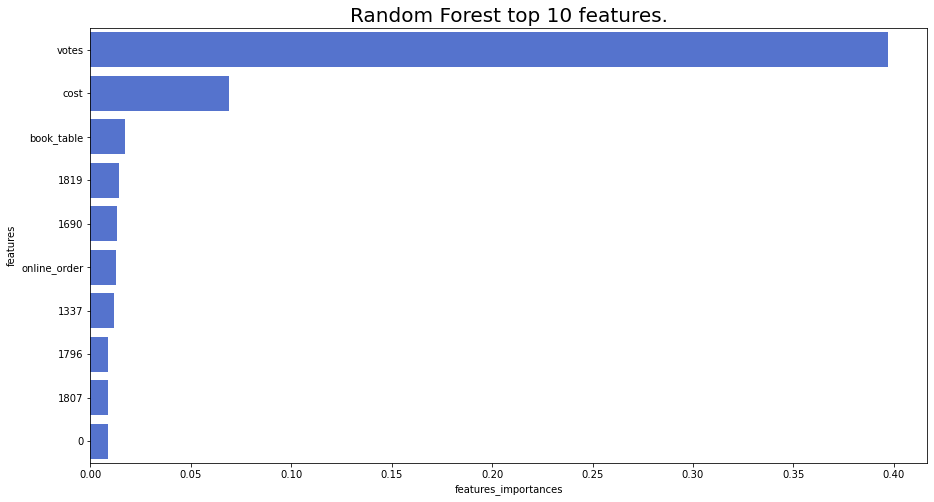

In [144]:
var_imp_plot(rf1[:10],'Random Forest top 10 features.')

- MSE =0.0294 , It is a good model


### Can we still improve our model?

### Not Null Features Only


#### Till now, we have considered ONE-HOT encoding of on below features.

- rest_type
- location
- cuisines
- online_order
- book_table




Here we are going to include below features also,
- dish_liked
- cuisines

#### Obviously we have to deal with large features set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nBagg')

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from joblib import dump,load
from wordcloud import WordCloud,STOPWORDS
plt.rcParams['figure.figsize'] = [15,8]
import ast #Abstract Syntax Trees

In [2]:
onehot = pd.read_csv("zomato.csv")
onehot.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


- This time we will drop all Null values. 
- Last time we saved some Null values by converting them to relative values. 
- But in this run we will neglect all values null. 
- Initially there are 51k values by removing NULL it will be somewhere around 23k.

In [3]:
onehot.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
onehot.rate=onehot.rate.replace('NEW',np.nan)
onehot.rate=onehot.rate.replace('-',np.nan)
onehot.dropna(how='any',inplace=True)
onehot['rate'] = onehot.loc[:,'rate'].replace('[ ]','',regex = True) # replace [] with '' string
onehot['rate'] = onehot['rate'].astype(str) # convert to string
onehot['rate'] = onehot['rate'].apply(lambda r: r.replace('/5','')) # replace '/5' character with '' string
onehot['rate'] = onehot['rate'].apply(lambda r: float(r)) # convert string back to float

In [5]:
onehot.cuisines=onehot.cuisines.str.replace(',','')
onehot.cuisines=onehot.cuisines.astype(str).apply(lambda x : ' '.join(sorted(x.split())))
onehot.cuisines.unique()

array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'], dtype=object)

In [6]:
onehot.dish_liked=onehot.dish_liked.str.replace(',','')
onehot.dish_liked=onehot.dish_liked.astype(str).apply(lambda x : ' '.join(sorted(x.split())))

In [7]:
onehot.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [8]:
onehot.average_cost=onehot.average_cost.str.replace(',','')

In [9]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '') 
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

Casual Dining        7298
Bites Quick          5224
Cafe                 2321
Bar Casual Dining    1308
Dessert Parlor       1074
Name: rest_type, dtype: int64

In [10]:
onehot.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,Biryani Buffet Corn Dum Lajawab Lunch Masala P...,Chinese Indian Mughlai North,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,Biryani Biryani Buffet Chicken Chocolate Curry...,Chinese Indian North Thai,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [11]:
X = onehot.drop(['rate','name'],axis=1)
y = onehot.rate

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((16132, 15), (6914, 15), (16132,), (6914,))

In [14]:
all_features =[]
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder=OneHotEncoder(handle_unknown='ignore')

In [16]:
#Avoid data leakage
def one_hot_fit_transform(df,col):
    out=df[col].values.reshape(-1,1)
    return encoder.fit_transform(out).toarray(),encoder.get_feature_names([col])

def one_hot_transform(df,col):
    out=df[col].values.reshape(-1,1)
    return encoder.transform(out).toarray()

In [17]:
tr_dummy_rest_type,rest_tr = one_hot_fit_transform(X_train1,'rest_type' )
te_dummy_rest_type = one_hot_transform(X_test1,'rest_type' )
all_features.extend(rest_tr)


tr_dummy_online_order, oo_tr = one_hot_fit_transform(X_train1,'online_order' )
te_dummy_online_order = one_hot_transform(X_test1,'online_order' )
all_features.extend(oo_tr)

tr_dummy_book_table,bt_tr = one_hot_fit_transform(X_train1,'book_table' )
te_dummy_book_table = one_hot_transform(X_test1,'book_table' )
all_features.extend(bt_tr)


tr_dummy_city,loc_tr = one_hot_fit_transform(X_train1,'location' )
te_dummy_city = one_hot_transform(X_test1,'location')
all_features.extend(loc_tr)


tr_dummy_cuisines,cui_tr = one_hot_fit_transform(X_train1,'cuisines' )
te_dummy_cuisines =one_hot_transform(X_test1,'cuisines')
all_features.extend(cui_tr)


tr_dummy_dishliked,dish_tr = one_hot_fit_transform(X_train1,'dish_liked' )
te_dummy_dishliked=one_hot_transform(X_test1,'dish_liked')
all_features.extend(dish_tr)

In [18]:

len(all_features)

5820

In [19]:
tr_dummy_rest_type.shape, te_dummy_rest_type.shape

((16132, 52), (6914, 52))

In [20]:
tr_dummy_online_order.shape, te_dummy_online_order.shape

((16132, 2), (6914, 2))

In [21]:
tr_dummy_book_table.shape, te_dummy_book_table.shape

((16132, 2), (6914, 2))

In [22]:
tr_dummy_city.shape, te_dummy_city.shape

((16132, 88), (6914, 88))

In [23]:
tr_dummy_cuisines.shape, te_dummy_cuisines.shape

((16132, 1253), (6914, 1253))

In [24]:
tr_dummy_dishliked.shape, te_dummy_dishliked.shape

((16132, 4423), (6914, 4423))

In [25]:
type(tr_dummy_dishliked)

numpy.ndarray

In [26]:
type(X_train1)

pandas.core.frame.DataFrame

## Create Final Train DF (Concate two Dataframes)

In [27]:
tr = pd.DataFrame(pd.np.column_stack([tr_dummy_rest_type,tr_dummy_online_order,tr_dummy_book_table,tr_dummy_city,tr_dummy_cuisines,tr_dummy_dishliked]),columns=all_features)

l1=X_train1.values.tolist()
l2=tr.values.tolist()
for i in range(len(l1)):
    l1[i].extend(l2[i])
X_train1=pd.DataFrame(l1,columns=X_train1.columns.tolist()+tr.columns.tolist())
X_train1.shape

(16132, 5835)

In [28]:
te=pd.DataFrame(pd.np.column_stack([te_dummy_rest_type,te_dummy_online_order,te_dummy_book_table,te_dummy_city,te_dummy_cuisines,te_dummy_dishliked]),columns=all_features)
print(te.shape)
l3=X_test1.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])
X_test1=pd.DataFrame(l3,columns=X_test1.columns.tolist()+te.columns.tolist())
X_test1.shape

(6914, 5820)


(6914, 5835)

## Deleting the Unwanted columns


- After OneHot enconding Achieved we will simply remove, redudant features.

In [29]:
X_train1.columns

Index(['url', 'address', 'online_order', 'book_table', 'votes', 'phone',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       ...
       'dish_liked_Sandwiches Tea', 'dish_liked_Shakes Thick',
       'dish_liked_Shawarma', 'dish_liked_Tea', 'dish_liked_Thali',
       'dish_liked_Thali Veg', 'dish_liked_Tikka', 'dish_liked_Vada',
       'dish_liked_Vegetarian', 'dish_liked_Waffles'],
      dtype='object', length=5835)

In [30]:
X_train1.drop([ 'rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table'],axis=1,inplace=True)

In [31]:
X_test1.drop([ 'rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table'],axis=1,inplace=True)

In [32]:
from joblib import load,dump
dump(X_train1, 'one_hot_X_train')
dump(X_test1, 'one_hot_X_test')
dump(y_train1, 'one_hot_y_train')
dump(y_test1, 'one_hot_y_test')

['one_hot_y_test']

In [33]:
from joblib import load,dump
X_train1 = load('one_hot_X_train')
X_test1 = load('one_hot_X_test')
y_train1 = load('one_hot_y_train')
y_test1 = load('one_hot_y_test')

In [34]:
X_train1.shape, y_train1.shape

((16132, 5822), (16132,))

In [35]:
X_test1.average_cost=X_test1.average_cost.str.replace(',','')
X_test1.average_cost=X_test1.average_cost.astype('float')

## Model -1 Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression,SGDRegressor
lr = LinearRegression()
lr.fit(X_train1,y_train1)
y_pred_lr = lr.predict(X_test1)

mse(y_test1, y_pred_lr)

78516590501.78552

## Model -2 SGDRegressor

In [42]:
sgdReg = SGDRegressor()
sgdReg.fit(X_train1,y_train1)
y_pred_sgdr = sgdReg.predict(X_test1)

mse(y_test1, y_pred_sgdr)

3.3980034645792244e+30

## Model -3 Random Forest Regressor

In [43]:
rfr = RandomForestRegressor()
rfr.fit(X_train1,y_train1)
y_pred_rfr = rfr.predict(X_test1)

In [44]:
mse(y_test1, y_pred_rfr)

0.017922294191912883

### Feature Importance

In [47]:
rf2=imp_df(X_train1.columns,rfr.feature_importances_)
rf2[:10]

,features,features_importances
0,votes,0.271780
1,average_cost,0.053055
2,book_table_Yes,0.028861
3,rest_type_Dessert Parlor,0.021878
4,rest_type_Casual Dining,0.015329
5,cuisines_Chinese Indian North,0.013555
6,rest_type_Bites Quick,0.008664
7,dish_liked_Biryani Biryani Chicken Chilli Mutt...,0.008158
8,dish_liked_Dance Dj Floor,0.007351
9,dish_liked_Burritos Chicken Margarita Mushroom...,0.006097


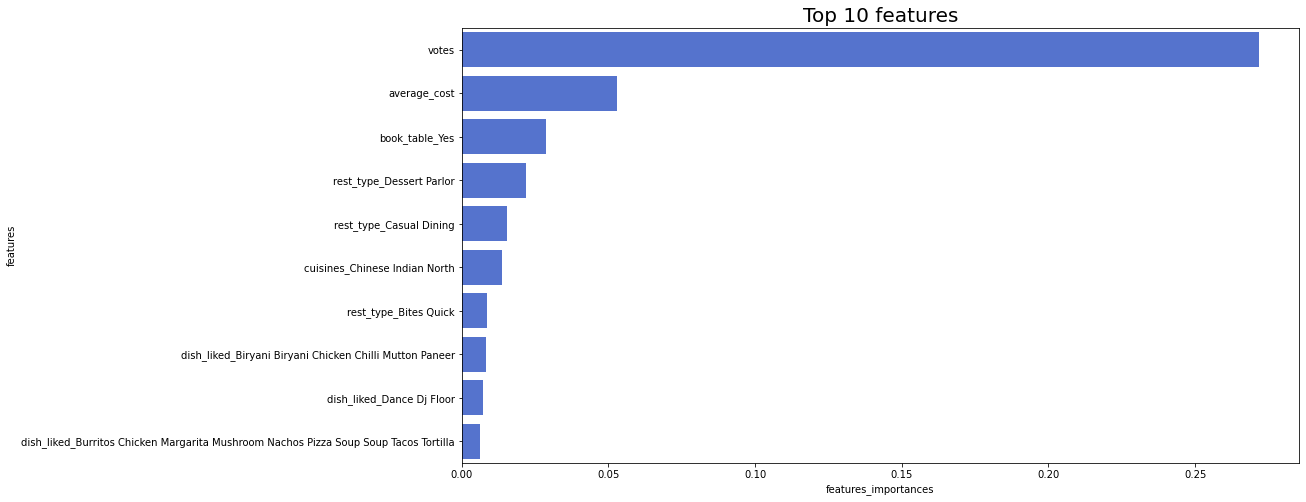

In [48]:
var_imp_plot(rf2[:10],'Top 10 features')

- This is brilliant, last we saw MSE = 0.018, without hyperparam tuning.

In [49]:
rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(X_train1,y_train1)
y_pred_rfr = rfr.predict(X_test1)



mse(y_test1, y_pred_rfr)

0.01783570307125419

In [50]:
base_imp = imp_df(X_train1.columns, rfr.feature_importances_)
base_imp[:10]

,features,features_importances
0,votes,0.271810
1,average_cost,0.052789
2,book_table_Yes,0.029097
3,rest_type_Dessert Parlor,0.021907
4,rest_type_Casual Dining,0.015137
5,cuisines_Chinese Indian North,0.013877
6,rest_type_Bites Quick,0.008557
7,dish_liked_Biryani Biryani Chicken Chilli Mutt...,0.008105
8,dish_liked_Dance Dj Floor,0.007675
9,cuisines_Mexican,0.005829


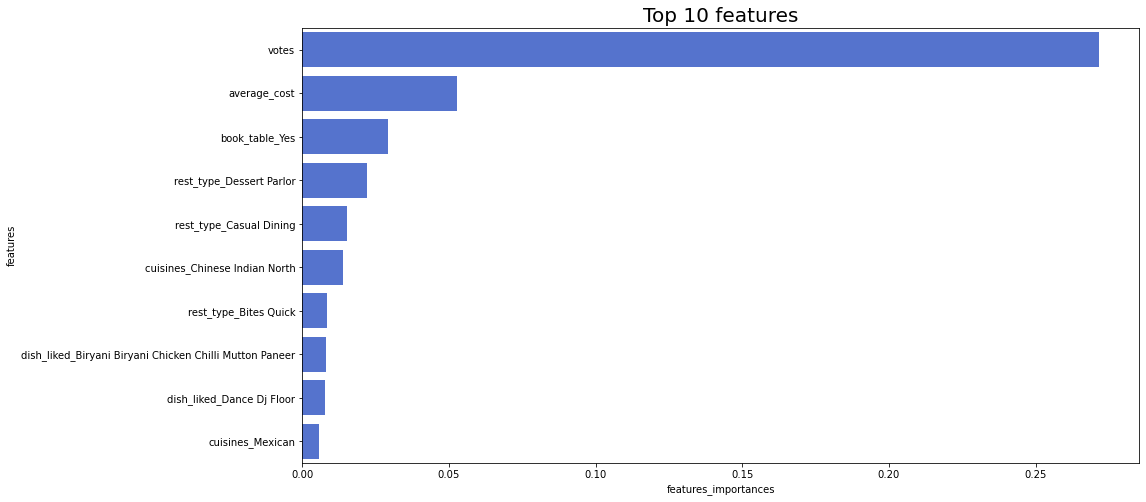

In [51]:
var_imp_plot(base_imp[:10],"Top 10 features")

## Feature Engineering




**Let's try response coding in categorical variable on regression model.**




**Basically what we are going to do replace categorical features with response coded features. In simple words we are going to consider each categorical feature once and find mean value of 'Rate' column.**

Eg.==> Consider "online_order" feature, which has two categories, 'Yes' and 'No'. So we will do a small hack, which is explained as below,

consider category as 'Yes' in 'online_order', take mean value of 'Rate'
similarly consider second category as 'No' in 'online_order', take mean value of 'Rate' column.
We will perform above logic using group_by on desired categorical column and simple take a mean of 'Rate' column.
Create new column which will contain mean values.
we will called it as MEAN VALUE REPLACEMENT

In [52]:
# re-insert rate column in train data
X_train1.insert(2, 'rate', y_train1, allow_duplicates = False)

In [53]:
# re-insert rate column in test data
X_test1.insert(2, 'rate', y_test1, allow_duplicates = False)

In [54]:
key_dict = dict()
def provide_response_coded_features(groupByVal,columnName, df):
    
    '''
    This function is used to convert categorical features into response coded features.
    It simply perform MEAN VALUE REPLACEMENT.
    '''
    mean_df = df.groupby([groupByVal]).mean()
    mean_dict =mean_df['rate'].to_dict()
    key_dict.update([ (groupByVal, mean_dict) ] )
    for k, v in mean_dict.items():
            mean_dict[k] = round(v,2)
    df[columnName] = df[groupByVal].map(mean_dict) 
    return df

In [ ]:
# create response coded feature for online_order feature.

mean_online_order = provide_response_coded_features('online_order','mean_online_order','X_train1')

In [ ]:
# create response coded feature for book_table feature.

mean_book_table =provide_response_coded_features('book_table','mean_book_table',X_train1)
mean_book_table[['rate','book_table','mean_book_table']][:10]

In [ ]:
# create response coded feature for rest_type feature.

mean_rest_type =provide_response_coded_features('rest_type','mean_rest_type',X_train1)
mean_rest_type[['rate','rest_type','mean_rest_type']][:20]

In [ ]:
# create response coded feature for dish_liked feature.

mean_rest_type =provide_response_coded_features('dish_liked','mean_dish_liked',X_train1)
mean_rest_type[['rate','dish_liked','mean_dish_liked']][:20]

In [ ]:
# create response coded feature for location feature.

mean_location =provide_response_coded_features('location','mean_location',X_train1)
mean_location[['rate','location','mean_location']][:10]

In [ ]:
# create response coded feature for cuisines feature.

mean_cuisines =provide_response_coded_features('cuisines','mean_cuisines',X_train1)
mean_cuisines[['rate','cuisines','mean_cuisines']][:10]

In [ ]:
for feature,values in key_dict.items():
    print(feature)

In [ ]:
def return_dict_mean_value(query_feature):
    
    '''
    'key_dict' is dictionary object which has all the Categorical variable names store as KEY and its mean as VALUE.
    This is function is used to return mean value for query_feature.
    
    KEY ==> 
    Value ==> Mean value response to that key
    
    query_feature ==>  Desired key
    Return ==> Categorical feature and their corresponding mean values. 
    '''
    
    result_dict=dict()

    for feature_name, values in key_dict.items():    
        if feature_name == query_feature:
            for key in values:
                result_dict.update([ (key, values[key]) ] )

                print(key + ':', values[key])
    return result_dict
return_dict_mean_value('online_order')

In [ ]:
## Test data

dict_online = return_dict_mean_value('online_order')
dict_book_table = return_dict_mean_value('book_table')
dict_rest_type = return_dict_mean_value('rest_type')
dict_location = return_dict_mean_value('location')
dict_cuisines = return_dict_mean_value('cuisines')
dict_dish_liked = return_dict_mean_value('dish_liked')

In [ ]:
X_test1['mean_online_order'] = X_test1['online_order'].map(dict_online)

In [ ]:
X_test1['mean_book_table']=X_test1['book_table'].map(dict_online)

In [ ]:
X_test1['mean_rest_type'] = X_test1['rest_type'].map(dict_rest_type)
X_test1['mean_location'] = X_test1['location'].map(dict_location)
X_test1['mean_cuisines'] = X_test1['cuisines'].map(dict_cuisines)
X_test1['mean_dish_liked'] = X_test1['dish_liked'].map(dict_dish_liked)

In [ ]:
##check NaN values. NaN value arise because there are some categories those are not present in test set.
X_test1.isna().sum()

In [ ]:
print("There are some category which is not present in train set which is % ",((1+71+506)/X_test1.shape[0])*100)

In [ ]:
# drop null values
X_test1.dropna(subset=['mean_dish_liked','mean_rest_type','mean_cuisines'],inplace=True)

In [ ]:
X_test1.isna().sum()

In [ ]:
X_test1.columns

In [ ]:
y_train2=X_train1.rate
y_test2=X_test1.rate

In [ ]:
X_train1.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','rate'], inplace=True)

In [ ]:
X_test1.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','rate'], inplace=True)

## Model - 1 Linear Regression Model

In [ ]:
lr = LinearRegression()
lr.fit(X_train1,y_train2)
y_pred_lr = lr.predict(X_test1)

mse(y_test2, y_pred_lr)

In [ ]:
#feature Importance
lr2=imp_df(X_train1.columns,lr.coef_)
lr2.head(10)

In [ ]:
var_imp_plot(lr2[:10],'Top 10')

- In short, it is saying we can remove those features.

In [ ]:
Randpred = pd.DataFrame({ "actual": y_test2, "pred": y_pred_lr })
Randpred

In [ ]:
## Model - 2

In [ ]:
sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train1,y_train2)
y_pred_sgd = sgdReg.predict(X_test1)

mse(y_test2, y_pred_sgd)

- Model is not learning. the mse is very high

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train1,y_train2)
y_pred_rfr = rfr.predict(X_test1)

mse(y_test2, y_pred_rfr)

In [ ]:
rfr1000 = RandomForestRegressor(n_estimators=1000)
rfr1000.fit(X_train1,y_train2)
y_pred_rfr1000 = rfr1000.predict(X_test1)

mse(y_test2, y_pred_rfr1000)

In [ ]:
base_imp = imp_df(X_train1.columns, rfr1000.feature_importances_)
base_imp[:10]

In [ ]:
var_imp_plot(base_imp[:10],"Top 10 features")

In [ ]:
Randpred = pd.DataFrame({ "actual": y_test2, "pred": y_pred_rfr1000 })
Randpred

## Summary

- Summary We collect data from CSV file, half of values were missing, we did not throw up all values, instead of throw NULL value we tried to fill estimate values using related colomn. 
- We tried only 5 one-hot encoded features and try different models Random Forest Regressor was most learning model, so we tune model using gridsearch technic, minimal MSE = 0.03485. 
- Then we tried with 7 one-hot encoded features and try on different models.Again Random Forest regressor was winning the race. we achieved MSE = 0.01404.
- Then we done some Feature Engineering, used response coded feature, but this time "Linear Regression" perform well than previous model , Random Forest Regressor is winning the race as usual. Finally we achieved MSE =0.00353.

- End of the day,below model are best among all the version.

- We collected data from CSV file, half of values were missing, we did not throw up all values, instead of removing NULL value we tried to fill appropriate values using related columns. 
- We tried only 5 one-hot encoded features and tried different models. Random Forest Regressor was most learning model, so we tuned model using gridsearch technique, minimal MSE = 0.03485. 
- Then we tried with 7 one-hot encoded features on different models.Again Random Forest regressor performed the best.
- Then we did some Feature Engineering, used response coded feature, but this time "Linear Regression" perform well than earlier , Random Forest Regressor is winning the race as usual.
- Random Forest Regressor with Not Null Features Only ==> 0.01838083239950155